In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["BP"] = le.fit_transform(df["BP"])
df["Cholesterol"] = le.fit_transform(df["Cholesterol"])
df["Drug"] = le.fit_transform(df["Drug"])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [8]:
X = df.drop(columns = "Drug", axis = 1)
y = df.iloc[:, -1]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [18]:
print(classification_report(y_test, y_pred, target_names=["Drug A", "Drug B", "Drug C", "Drug X", "Drug Y"]))

              precision    recall  f1-score   support

      Drug A       1.00      1.00      1.00         6
      Drug B       1.00      1.00      1.00         3
      Drug C       1.00      1.00      1.00         5
      Drug X       1.00      1.00      1.00        11
      Drug Y       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



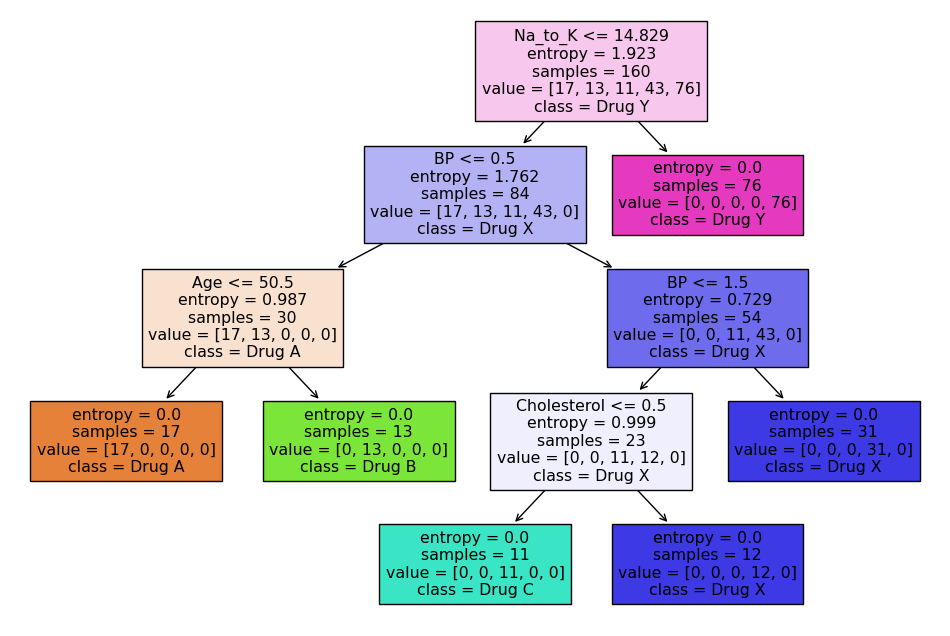

In [19]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Drug A", "Drug B", "Drug C", "Drug X", "Drug Y"])
plt.show() 